# Compare our values to Nirody et al. 2021
<br>
This notebook = inter-leg coordination <br>
  ... in Nirody this is:<br>

### Figure 4
### Figure S6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import gaitFunctions
import plotClip
from scipy import stats
import seaborn as sns

In [2]:
# navigate to directory that contains the data
os.chdir('/Users/iwoods/OneDrive - Ithaca College/movement_disorder_paper_2023/videos_exemplaris/analyses_summaries/')
for f in sorted(glob.glob('*.xlsx')):
    print(f)

4Jan_combined_21Dec_11Dec_9Nov.xlsx
iw_11Dec23_exemplaris_inverted_combined.xlsx
iw_21Dec23_exemplaris_inverted_combined.xlsx
iw_9Nov23_exemplaris_inverted_combined.xlsx


In [3]:
# specify the data file
data_file = '4Jan_combined_21Dec_11Dec_9Nov.xlsx'

In [4]:
def swingTimingProbabilities(proportions, step_df, ref_leg, comp_leg, comp_type = 'swingswing'):
    
    if comp_type == 'swingswing':
        comps = ['UpTime','UpTime']
    elif comp_type == 'stanceswing':
        comps = ['DownTime','UpTime']
    elif comp_type == 'swingstance':
        comps = ['UpTime','DownTime']
    elif compt_type == 'stancestance':
        comps = ['DownTime','DownTime']
    else:
        comps = ['UpTime','UpTime']
    
    individuals = np.sort(np.unique(step_df['uniq_id'].values))
    for individual in individuals:
        individual_data = step_df[step_df['uniq_id']==individual]
        ref_leg_events = individual_data[individual_data['legID'] == ref_leg][comps[0]].values
        comp_leg_events = individual_data[individual_data['legID'] == comp_leg][comps[1]].values
        for i, ref_event in enumerate(ref_leg_events[:-1]):
            next_ref_event = ref_leg_events[i+1]
            next_comp_idx = np.where(comp_leg_events>ref_event)[0]
            if len(next_comp_idx) > 0:
                next_comp_event = comp_leg_events[next_comp_idx[0]]
                ref_cycle = next_ref_event-ref_event
                comp_event_offset = next_comp_event-ref_event
                comp_event_phase_proportion = comp_event_offset / ref_cycle
#                 print(ref_event, next_comp_event, next_ref_event, comp_event_phase_proportion) # testing
                if comp_event_offset <= ref_cycle:
                    proportions.append(comp_event_phase_proportion)  
            
    return proportions

In [5]:
first_pair = ['L1','R1']
second_pair = ['L2','R2']
third_pair = ['L3','R3']
fourth_pair = ['L4','R4']
rear_legs = fourth_pair
lateral_legs = third_pair + second_pair + first_pair
ipsi_offset_legs = third_pair + second_pair
left_laterals = [x[0] for x in [third_pair, second_pair, first_pair]]
right_laterals = [x[1] for x in [third_pair, second_pair, first_pair]]
all_legs = rear_legs + lateral_legs
left_legs = [x[0] for x in [fourth_pair, third_pair, second_pair, first_pair]]
right_legs = [x[1] for x in [fourth_pair, third_pair, second_pair, first_pair]]
single_leg = ['R4']

# dictionaries of inter-leg relationships
ipsi_legs = {'L4':'L3','R4':'R3','L3':'L2','L2':'L1','R3':'R2','R2':'R1'}
contra_legs = {'L4':'R4','R4':'L4','L3':'R3','L2':'R2','R3':'L3','R2':'L2','L1':'R1','R1':'L1'}

# colors
all_leg_color = '#00b6eb' # light blue
L2_L1_color =   '#e5330d' # red
L3_L2_color =   '#302382' # purple
R2_R1_color =   '#006f2a' # green
R3_R2_color =   '#ffd500' # yellow

# load data from data_file
step_df = pd.read_excel(data_file, sheet_name='step_timing', index_col=None)

# Nirody Figure 4

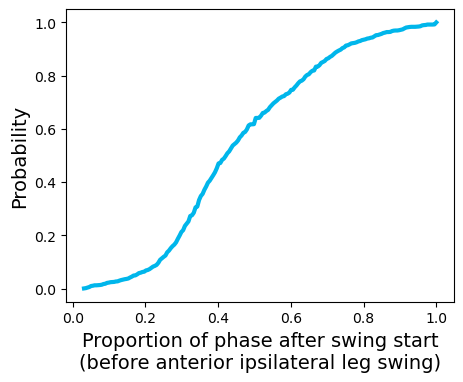

In [6]:
# 4A
proportions = []
for leg in ipsi_offset_legs:
    proportions = swingTimingProbabilities(proportions, step_df, leg, ipsi_legs[leg])

fig,ax = plt.subplots(1,1,figsize=(5,3.8))
H,X1 = np.histogram(proportions, bins = 200, density = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
ax.plot(X1[1:], F1, linewidth=3, color = all_leg_color, label='all legs')

# seaborn kernel density estimation
# ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, cumulative=True,
#                   stat='probability',line_kws={'linewidth':5},
#                   color=all_leg_color, edgecolor='w', visible=False) # can set to False to hide bars
plt.xlabel('Proportion of phase after swing start\n(before anterior ipsilateral leg swing)',fontsize=14)
ax.yaxis.label.set_size(14)
ax.set_ylabel('Probability',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.show()

L2 : 465 steps
L3 : 472 steps
R2 : 474 steps
R3 : 467 steps


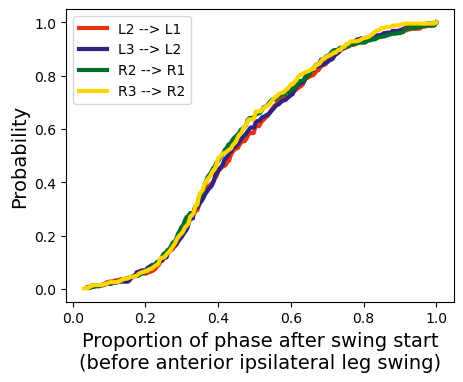

In [7]:
# 4A, inset

f,ax = plt.subplots(1,1,figsize=(5,3.8))
leg_comps = [['L2','L1'],['L3','L2'],['R2','R1'],['R3','R2']]
plot_cols = [L2_L1_color,L3_L2_color,R2_R1_color,R3_R2_color]
ypos = 1

for i, comp in enumerate(leg_comps):
    proportions = []
    
    proportions = swingTimingProbabilities(proportions, step_df, comp[0], comp[1])
    H,X1 = np.histogram(proportions, bins = 200, density = True )
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    ax.plot(X1[1:], F1, linewidth=3, color = plot_cols[i], label=' --> '.join(comp))
    
#     ax = sns.histplot(proportions, ax=ax, binwidth=0.05, cumulative=True,
#                       stat='probability',line_kws={'linewidth':3}, kde=True,
#                       color=plot_cols[i], edgecolor='w', visible=False) # can set to false to hide bars
    
#     # klugey legend
#     plt.plot([0,0.08],[ypos,ypos],color=plot_cols[i],linewidth=3)
#     plt.text(0.1,ypos-0.01, ' --> '.join(comp),fontsize=12)
#     ypos -= 0.06
    
    print(comp[0], ':', len(proportions), 'steps')

plt.xlabel('Proportion of phase after swing start\n(before anterior ipsilateral leg swing)',fontsize=14)
ax.yaxis.label.set_size(14)
ax.set_ylabel('Probability',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)    
ax.legend()
plt.show()

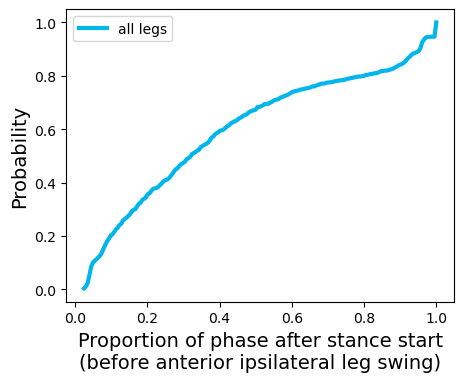

In [8]:
# 4B
proportions = []
for leg in ipsi_offset_legs:
    proportions = swingTimingProbabilities(proportions, step_df, leg, ipsi_legs[leg], 'stanceswing')

fig,ax = plt.subplots(1,1,figsize=(5,3.8))

H,X1 = np.histogram(proportions, bins = 200, density = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
ax.plot(X1[1:], F1, linewidth=3, color = all_leg_color, label='all legs')
# ax = sns.histplot(proportions, ax=ax, binwidth=0.05, cumulative=True, kde=True,
#                   stat='probability',line_kws={'linewidth':5},
#                   color=all_leg_color, edgecolor='w', visible=False) # can set to False to hide bars
plt.xlabel('Proportion of phase after stance start\n(before anterior ipsilateral leg swing)',fontsize=14)
ax.yaxis.label.set_size(14)
ax.set_ylabel('Probability',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)   
ax.legend()
plt.show()

L2 : 407 steps
L3 : 425 steps
R2 : 410 steps
R3 : 420 steps


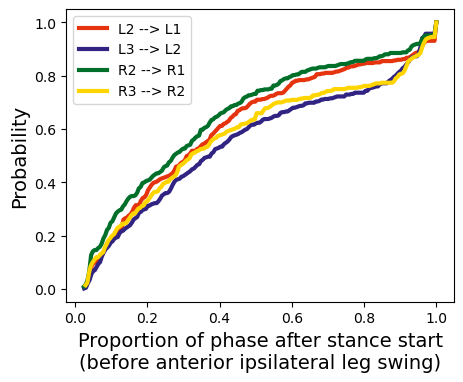

In [9]:
# 4B, inset

f,ax = plt.subplots(1,1,figsize=(5,3.8))
leg_comps = [['L2','L1'],['L3','L2'],['R2','R1'],['R3','R2']]
plot_cols = [L2_L1_color,L3_L2_color,R2_R1_color,R3_R2_color]
ypos = 1

for i, comp in enumerate(leg_comps):
    proportions = []
    
    proportions = swingTimingProbabilities(proportions, step_df, comp[0], comp[1], 'stanceswing')
  
    H,X1 = np.histogram(proportions, bins = 200, density = True )
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    ax.plot(X1[1:], F1, linewidth=3, color = plot_cols[i], label=' --> '.join(comp))

#     ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, cumulative=True,
#                       stat='probability',line_kws={'linewidth':3}, legend=True,
#                       color=plot_cols[i], edgecolor='w', visible=False) # can set to false to hide bars
    
#     # klugey legend
#     plt.plot([0,0.08],[ypos,ypos],color=plot_cols[i],linewidth=3)
#     plt.text(0.1,ypos-0.01, ' --> '.join(comp),fontsize=12)
#     ypos -= 0.06
    
    print(comp[0], ':', len(proportions), 'steps')
ax.legend()
plt.xlabel('Proportion of phase after stance start\n(before anterior ipsilateral leg swing)',fontsize=14)
ax.set_ylabel('Probability',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)   
plt.show()

1878 steps


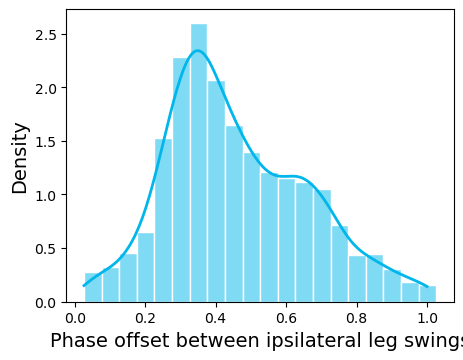

In [10]:
# 4C
proportions = []
for leg in ipsi_offset_legs:
    proportions = swingTimingProbabilities(proportions, step_df, leg, ipsi_legs[leg])

fig,ax = plt.subplots(1,1,figsize=(5,3.8))
ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, stat='density',line_kws={'linewidth':2},
                  color=all_leg_color, edgecolor='w', visible=True) # can set to False to hide bars
print(len(proportions), 'steps')
ax.yaxis.label.set_size(14)
ax.tick_params(axis='both', which='major', labelsize=10) 
ax.set_xlabel('Phase offset between ipsilateral leg swings', fontsize=14)
plt.show()

L2 : 465 steps
L3 : 472 steps
R2 : 474 steps
R3 : 467 steps


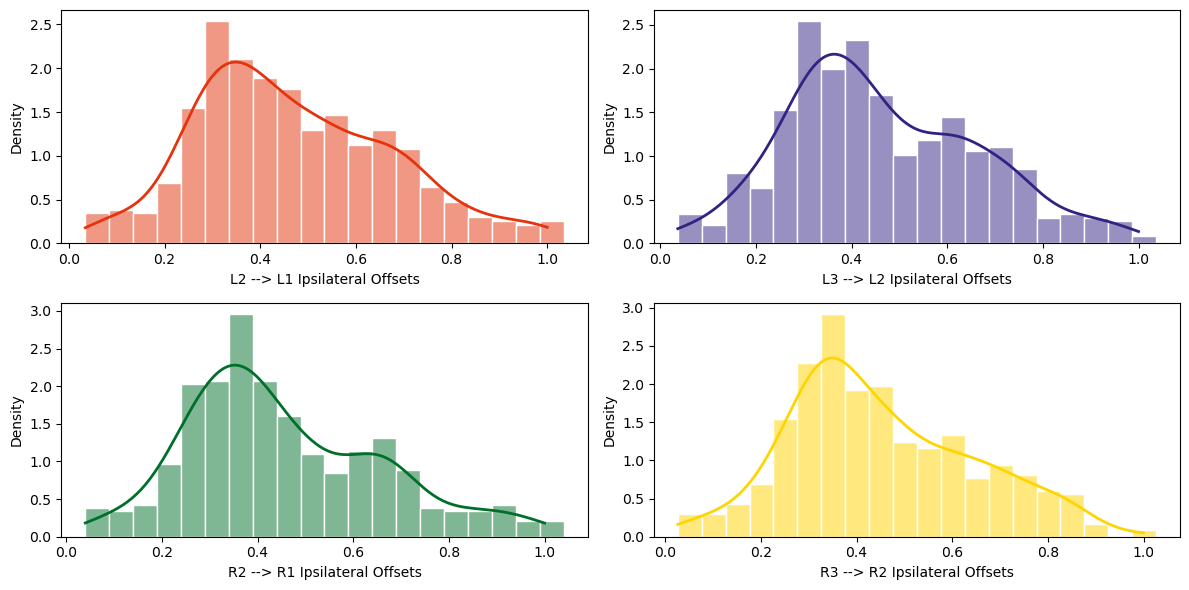

In [15]:
# 4C, inset

f,axes = plt.subplots(2,2,figsize=(12,6))
leg_comps = [['L2','L1'],['L3','L2'],['R2','R1'],['R3','R2']]
plot_cols = [L2_L1_color,L3_L2_color,R2_R1_color,R3_R2_color]

for i, ax in enumerate(axes.flat):
    proportions = []
    
    proportions = swingTimingProbabilities(proportions, step_df, leg_comps[i][0], leg_comps[i][1])
    
    ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, stat='density',line_kws={'linewidth':2},
                  color=plot_cols[i], edgecolor='w', visible=True) # can set to false to hide bars
    
    ax.set_xlabel(' --> '.join(leg_comps[i]) + ' Ipsilateral Offsets')
    
    print(leg_comps[i][0], ':', len(proportions), 'steps')

plt.tight_layout()
plt.show()

Strides:  1517


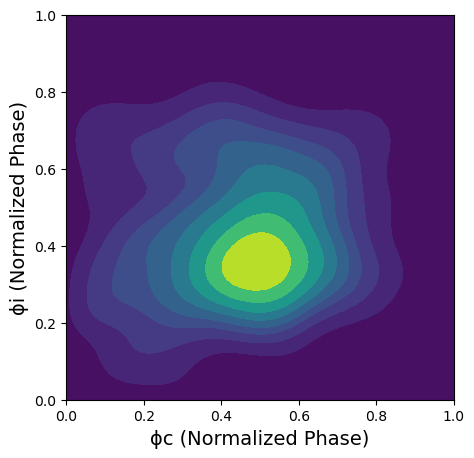

In [16]:
# 4D contralateral vs. ipsilateral
ipsi_swing_offset_proportions = []
contra_swing_offset_proportions = []

# code modified from function above
individuals = np.sort(np.unique(step_df['uniq_id'].values))
for ref_leg in ipsi_offset_legs:
    for individual in individuals:
        individual_data = step_df[step_df['uniq_id']==individual]
        ref_leg_swings = individual_data[individual_data['legID'] == ref_leg]['UpTime'].values
        anterior_leg_swings = individual_data[individual_data['legID'] == ipsi_legs[ref_leg]]['UpTime'].values
        opposite_leg_swings = individual_data[individual_data['legID'] == contra_legs[ref_leg]]['UpTime'].values
        
        for i, ref_swing in enumerate(ref_leg_swings[:-1]):
            next_ref_swing = ref_leg_swings[i+1]
            next_ant_idx = np.where(anterior_leg_swings>ref_swing)[0]
            next_opp_idx = np.where(opposite_leg_swings>ref_swing)[0]
            
            if len(next_ant_idx) > 0 and len(next_opp_idx) > 0:
                next_ant_swing = anterior_leg_swings[next_ant_idx[0]]
                next_opp_swing = opposite_leg_swings[next_opp_idx[0]]
                
                ref_cycle = next_ref_swing-ref_swing
                
                ant_swing_offset = next_ant_swing-ref_swing
                opp_swing_offset = next_opp_swing-ref_swing
                
                ant_swing_phase_proportion = ant_swing_offset / ref_cycle
                opp_swing_phase_proportion = opp_swing_offset / ref_cycle
                
                if ant_swing_phase_proportion <= ref_cycle and opp_swing_phase_proportion < ref_cycle:
                    ipsi_swing_offset_proportions.append(ant_swing_phase_proportion) 
                    contra_swing_offset_proportions.append(opp_swing_phase_proportion)

ipsi_phase = np.array(ipsi_swing_offset_proportions)
cont_phase = np.array(contra_swing_offset_proportions)
print('Strides: ', len(ipsi_phase))
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax = sns.kdeplot(x=cont_phase, y=ipsi_phase, fill=True, cmap='viridis', thresh=0, levels=10)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xlabel('ϕc (Normalized Phase)', fontsize=14)
ax.set_ylabel('ϕi (Normalized Phase)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.show()

# Nirody supplemental figure S6

L3
L2
L1
1388 steps


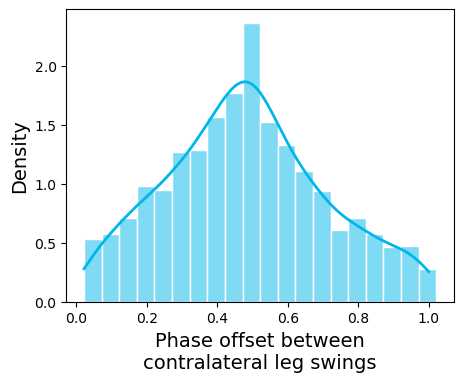

In [17]:
# S6 B
proportions = []
for leg in left_laterals:
    print(leg)
    proportions = swingTimingProbabilities(proportions, step_df, leg, contra_legs[leg])

fig,ax = plt.subplots(1,1,figsize=(5,3.8))
ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, stat='density',line_kws={'linewidth':2},
                  color=all_leg_color, edgecolor='w', visible=True) # can set to False to hide bars
print(len(proportions), 'steps')
ax.yaxis.label.set_size(14)
ax.tick_params(axis='both', which='major', labelsize=10) 
ax.set_xlabel('Phase offset between\ncontralateral leg swings', fontsize=14)
plt.show()

L3 : 466 steps
L2 : 451 steps
L1 : 471 steps


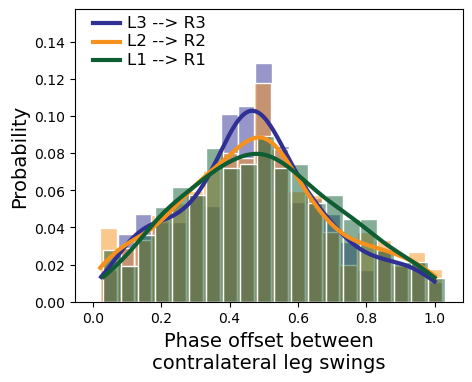

In [18]:
# S6 B inset

L3_R3_color =   '#2e3093' # purple
L2_R2_color =   '#f7911d' # orange
L1_R1_color =   '#0e5d33' # green

f,ax = plt.subplots(1,1,figsize=(5,3.8))
leg_comps = [['L3','R3'],['L2','R2'],['L1','R1']]
plot_cols = [L3_R3_color,L2_R2_color,L1_R1_color]
ypos = 0.15

for i, comp in enumerate(leg_comps):
    proportions = []
    
    proportions = swingTimingProbabilities(proportions, step_df, comp[0], comp[1])
#     H,X1 = np.histogram(proportions, bins = 200, density = True )
#     dx = X1[1] - X1[0]
#     F1 = np.cumsum(H)*dx
#     ax.plot(X1[1:], F1, linewidth=3, color = plot_cols[i], label=' --> '.join(comp))
    
    ax = sns.histplot(proportions, ax=ax, binwidth=0.05,
                      stat='probability',line_kws={'linewidth':3}, kde=True,
                      color=plot_cols[i], edgecolor='w', visible=True) # can set to false to hide bars
    
    # klugey legend
    plt.plot([0,0.08],[ypos,ypos],color=plot_cols[i],linewidth=3)
    plt.text(0.1,ypos-0.002, ' --> '.join(comp),fontsize=12)
    ypos -= 0.01
    
    print(comp[0], ':', len(proportions), 'steps')

ax.yaxis.label.set_size(14)
ax.tick_params(axis='both', which='major', labelsize=10) 
ax.set_xlabel('Phase offset between\ncontralateral leg swings', fontsize=14)
plt.show()

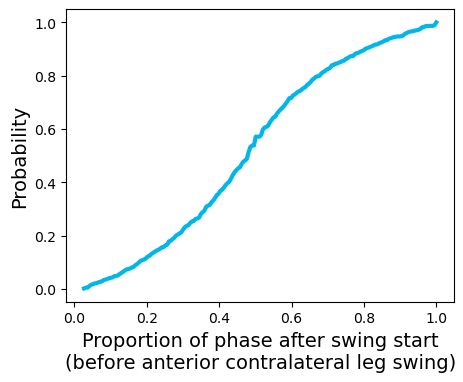

In [19]:
# S6 C
proportions = []
for leg in left_laterals:
    proportions = swingTimingProbabilities(proportions, step_df, leg, contra_legs[leg])

fig,ax = plt.subplots(1,1,figsize=(5,3.8))
H,X1 = np.histogram(proportions, bins = 200, density = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
ax.plot(X1[1:], F1, linewidth=3, color = all_leg_color, label='all legs')

# seaborn kernel density estimation
# ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, cumulative=True,
#                   stat='probability',line_kws={'linewidth':5},
#                   color=all_leg_color, edgecolor='w', visible=False) # can set to False to hide bars
plt.xlabel('Proportion of phase after swing start\n(before anterior contralateral leg swing)',fontsize=14)
ax.yaxis.label.set_size(14)
ax.set_ylabel('Probability',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.show()

L3 : 466 steps
L2 : 451 steps
L1 : 471 steps


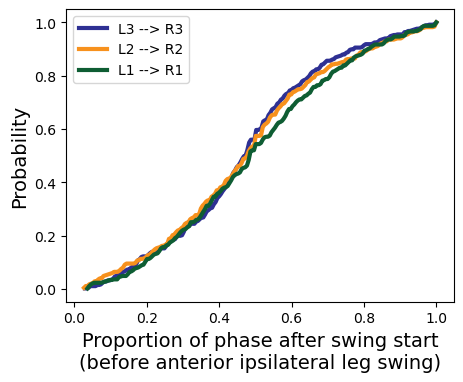

In [20]:
# S6 C, inset

f,ax = plt.subplots(1,1,figsize=(5,3.8))
leg_comps = [['L3','R3'],['L2','R2'],['L1','R1']]
plot_cols = [L3_R3_color,L2_R2_color,L1_R1_color]

for i, comp in enumerate(leg_comps):
    proportions = []
    
    proportions = swingTimingProbabilities(proportions, step_df, comp[0], comp[1])
    H,X1 = np.histogram(proportions, bins = 200, density = True )
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    ax.plot(X1[1:], F1, linewidth=3, color = plot_cols[i], label=' --> '.join(comp))
    
#     ax = sns.histplot(proportions, ax=ax, binwidth=0.05, cumulative=True,
#                       stat='probability',line_kws={'linewidth':3}, kde=True,
#                       color=plot_cols[i], edgecolor='w', visible=False) # can set to false to hide bars
    
#     # klugey legend
#     plt.plot([0,0.08],[ypos,ypos],color=plot_cols[i],linewidth=3)
#     plt.text(0.1,ypos-0.01, ' --> '.join(comp),fontsize=12)
#     ypos -= 0.06
    
    print(comp[0], ':', len(proportions), 'steps')

plt.xlabel('Proportion of phase after swing start\n(before anterior ipsilateral leg swing)',fontsize=14)
ax.yaxis.label.set_size(14)
ax.set_ylabel('Probability',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)    
ax.legend()
plt.show()

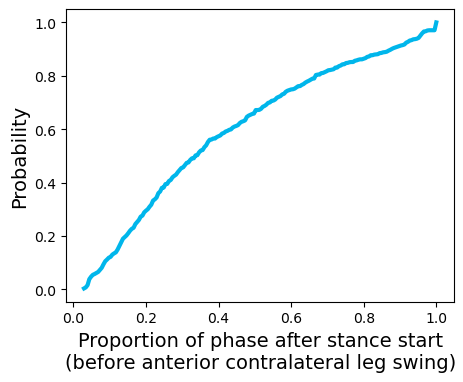

In [21]:
# S6 D
proportions = []
for leg in left_laterals:
    proportions = swingTimingProbabilities(proportions, step_df, leg, contra_legs[leg], 'stanceswing')

fig,ax = plt.subplots(1,1,figsize=(5,3.8))
H,X1 = np.histogram(proportions, bins = 200, density = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
ax.plot(X1[1:], F1, linewidth=3, color = all_leg_color, label='all legs')

# seaborn kernel density estimation
# ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, cumulative=True,
#                   stat='probability',line_kws={'linewidth':5},
#                   color=all_leg_color, edgecolor='w', visible=False) # can set to False to hide bars
plt.xlabel('Proportion of phase after stance start\n(before anterior contralateral leg swing)',fontsize=14)
ax.yaxis.label.set_size(14)
ax.set_ylabel('Probability',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.show()

L3 : 433 steps
L2 : 427 steps
L1 : 435 steps


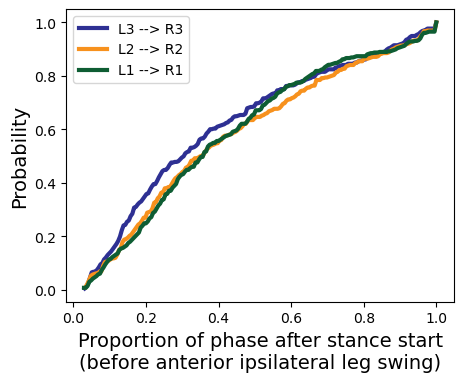

In [22]:
# S6 D, inset

f,ax = plt.subplots(1,1,figsize=(5,3.8))
leg_comps = [['L3','R3'],['L2','R2'],['L1','R1']]
plot_cols = [L3_R3_color,L2_R2_color,L1_R1_color]

for i, comp in enumerate(leg_comps):
    proportions = []
    
    proportions = swingTimingProbabilities(proportions, step_df, comp[0], comp[1], 'stanceswing')
    H,X1 = np.histogram(proportions, bins = 200, density = True )
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    ax.plot(X1[1:], F1, linewidth=3, color = plot_cols[i], label=' --> '.join(comp))
    
#     ax = sns.histplot(proportions, ax=ax, binwidth=0.05, cumulative=True,
#                       stat='probability',line_kws={'linewidth':3}, kde=True,
#                       color=plot_cols[i], edgecolor='w', visible=False) # can set to false to hide bars
    
#     # klugey legend
#     plt.plot([0,0.08],[ypos,ypos],color=plot_cols[i],linewidth=3)
#     plt.text(0.1,ypos-0.01, ' --> '.join(comp),fontsize=12)
#     ypos -= 0.06
    
    print(comp[0], ':', len(proportions), 'steps')

plt.xlabel('Proportion of phase after stance start\n(before anterior ipsilateral leg swing)',fontsize=14)
ax.yaxis.label.set_size(14)
ax.set_ylabel('Probability',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)    
ax.legend()
plt.show()

# Rear Leg vs Other Leg Timing

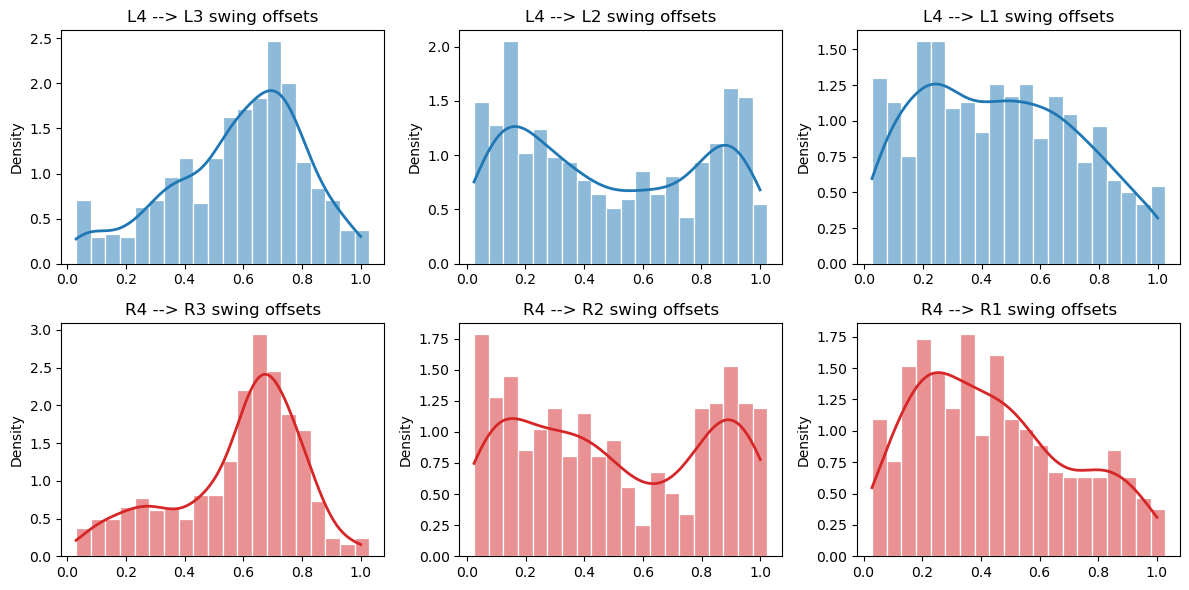

In [24]:
f,axes = plt.subplots(2,3,figsize=(12,6))
R_rear_color = 'tab:red'
L_rear_color = 'tab:blue'
leg_comps = [['L4','L3'],['L4','L2'],['L4','L1'],['R4','R3'],['R4','R2'],['R4','R1']]
plot_cols = [L_rear_color] * 3 + [R_rear_color] * 3

for i, ax in enumerate(axes.flat):
    proportions = []
    
    proportions = swingTimingProbabilities(proportions, step_df, leg_comps[i][0], leg_comps[i][1])
    
    ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, stat='density',line_kws={'linewidth':2},
                  color=plot_cols[i], edgecolor='w', visible=True) # can set to false to hide bars
    
    ax.set_title(leg_comps[i][0] + ' --> ' + leg_comps[i][1] + ' swing offsets')

plt.tight_layout()

540 steps for L4
1388 steps for L3, L2, L1


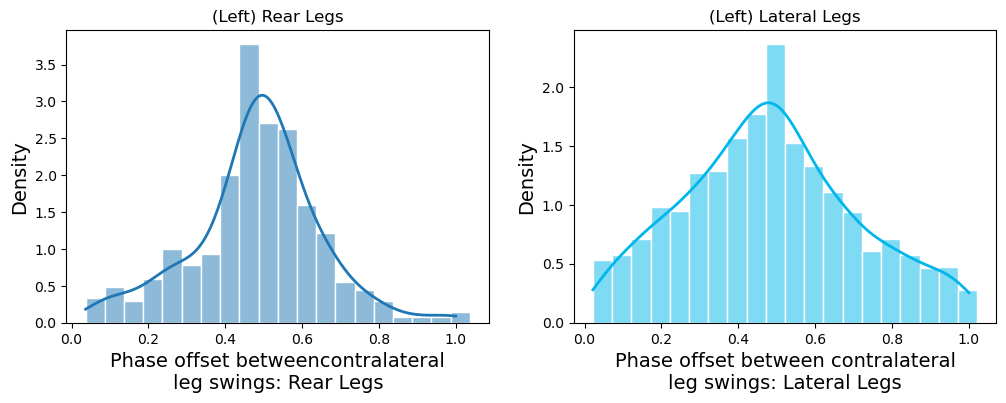

In [28]:
# Rear leg vs. contralateral rear leg

proportions = []
for leg in ['L4']:
    proportions = swingTimingProbabilities(proportions, step_df, leg, contra_legs[leg])

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,3.8))
ax1 = sns.histplot(proportions, ax=ax1, binwidth=0.05, kde=True, stat='density',line_kws={'linewidth':2},
                  color=L_rear_color, edgecolor='w', visible=True) # can set to False to hide bars
print(len(proportions), 'steps for L4')
ax1.yaxis.label.set_size(14)
ax1.tick_params(axis='both', which='major', labelsize=10) 
ax1.set_xlabel('Phase offset betweencontralateral\nleg swings: Rear Legs', fontsize=14)
ax1.set_title('(Left) Rear Legs')

proportions = []
for leg in left_laterals:
    proportions = swingTimingProbabilities(proportions, step_df, leg, contra_legs[leg])

ax2 = sns.histplot(proportions, ax=ax2, binwidth=0.05, kde=True, stat='density',line_kws={'linewidth':2},
                  color=all_leg_color, edgecolor='w', visible=True) # can set to False to hide bars
print(len(proportions), 'steps for L3, L2, L1')
ax2.yaxis.label.set_size(14)
ax2.tick_params(axis='both', which='major', labelsize=10) 
ax2.set_xlabel('Phase offset between contralateral\nleg swings: Lateral Legs', fontsize=14)
ax2.set_title('(Left) Lateral Legs')

plt.show()

# speed vs. coordination strength

In [33]:
# load data from data_file
gait_summaries_df = pd.read_excel(data_file, sheet_name='gait_summaries', index_col=None)
print(gait_summaries_df.columns)
gait_summaries_df.head(3)

Index(['Identifier', 'treatment', 'individual', 'date', 'Number of frames',
       '% stand (lateral legs)', '% pentapod (lateral legs)',
       '% tetrapod canonical (lateral legs)',
       '% tetrapod gallop (lateral legs)', '% tetrapod other (lateral legs)',
       '% tetrapod total (lateral legs)', '% tripod canonical (lateral legs)',
       '% tripod other (lateral legs)', '% tripod total (lateral legs',
       '% other (lateral legs)', '% stand (rear legs)', '% hop (rear legs)',
       '% step (rear legs)', 'Tetrapod Coordination Strength',
       'Tetrapod Bout Speed (bodylength / s)', 'Tripod Coordination Strength',
       'Tripod Bout Speed (bodylength / s)'],
      dtype='object')


,Identifier,treatment,individual,date,Number of frames,% stand (lateral legs),% pentapod (lateral legs),% tetrapod canonical (lateral legs),% tetrapod gallop (lateral legs),% tetrapod other (lateral legs),...,% tripod other (lateral legs),% tripod total (lateral legs,% other (lateral legs),% stand (rear legs),% hop (rear legs),% step (rear legs),Tetrapod Coordination Strength,Tetrapod Bout Speed (bodylength / s),Tripod Coordination Strength,Tripod Bout Speed (bodylength / s)
0,iw_11dec_tardigrade01_exemplaris,11dec,tardigrade01,11dec,538,11.152416,50.371747,24.721190,7.992565,5.390335,...,0.000000,0.371747,0.0,13.382900,1.858736,84.758364,0.364328,0.163901,0.058252,0.166542
1,iw_11dec_tardigrade02_exemplaris,11dec,tardigrade02,11dec,564,3.014184,31.737589,31.737589,14.716312,5.319149,...,12.234043,13.475177,0.0,19.680851,5.851064,74.468085,0.320263,0.264520,0.190085,0.250181
2,iw_11dec_tardigrade03_exemplaris,11dec,tardigrade03,11dec,506,16.600791,44.466403,27.667984,4.743083,4.545455,...,1.581028,1.976285,0.0,31.225296,0.988142,67.786561,0.459024,0.160521,0.100660,0.117125


Speed vs. tetrapod coordination ρ = -0.09 p = 0.59
Speed vs. tripod coordination ρ = 0.34 p = 0.05


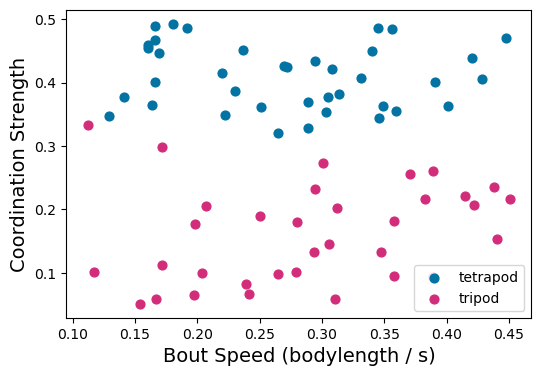

In [45]:
# speed vs. tetrapod coordination strength
tetrapod_speed_label = 'Tetrapod Bout Speed (bodylength / s)'
tetrapod_coordination_label = 'Tetrapod Coordination Strength'
tripod_speed_label = 'Tripod Bout Speed (bodylength / s)'
tripod_coordination_label = 'Tripod Coordination Strength'

tetrapod_speed = gait_summaries_df[tetrapod_speed_label].values
tetrapod_coordination = gait_summaries_df[tetrapod_coordination_label].values
tripod_speed = gait_summaries_df[tripod_speed_label].values
tripod_speed = tripod_speed[~np.isnan(tripod_speed)]
tripod_coordination = gait_summaries_df[tripod_coordination_label].values
tripod_coordination = tripod_coordination[~np.isnan(tripod_coordination)]

combos, color_dict = gaitFunctions.get_gait_combo_colors('lateral')
tetrapod_color = color_dict['tetrapod_canonical']
tripod_color = color_dict['tripod_canonical']

fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.scatter(tetrapod_speed, tetrapod_coordination, s=40, c=tetrapod_color, label='tetrapod')
ax.scatter(tripod_speed, tripod_coordination, s=40, c=tripod_color, label='tripod')
ax.set_xlabel('Bout Speed (bodylength / s)', fontsize=14)
ax.set_ylabel('Coordination Strength', fontsize=14)
ax.legend()

r,p = stats.spearmanr(tetrapod_speed,tetrapod_coordination)
print('Speed vs. tetrapod coordination ρ =', np.round(r,2), 'p =', np.round(p,2))
r,p = stats.spearmanr(tripod_speed,tripod_coordination)
print('Speed vs. tripod coordination ρ =', np.round(r,2), 'p =', np.round(p,2))

ax.tick_params(axis='both', which='major', labelsize=10) 

plt.show()